In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import time
start_time = time.time()

In [2]:
print("Process Initialised")

Process Initialised


# Load Training Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 18 s
Wall time: 18.1 s


In [6]:
%%time
# df_train = pd.read_csv("/work/50007-2022/train_tfidf_features.csv")
# display(df_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
%%time
df_train.describe()

CPU times: total: 9.69 s
Wall time: 9.74 s


,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,...,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,8592.500000,0.381227,0.000150,0.001066,0.001532,0.000369,0.000140,0.000066,0.000270,0.000483,...,0.000202,0.000429,0.000286,0.000075,0.000260,0.000709,0.000257,0.000121,0.000308,0.000159
std,4960.737848,0.485702,0.008297,0.019532,0.024741,0.012334,0.008276,0.005065,0.009907,0.013106,...,0.010215,0.013178,0.011378,0.005866,0.010864,0.017641,0.010246,0.006529,0.010526,0.008536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4296.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8592.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12888.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17184.000000,1.000000,0.676327,0.560830,0.958430,0.646740,0.532789,0.437760,0.435835,0.536746,...,0.611122,0.540809,0.566613,0.592170,0.617341,0.850605,0.484908,0.398105,0.430031,0.528556


# Task 1: Implement Logistic Regression
Recalled that you have learned about Logistic Regression in your earlier class. Your task is to implement a Logistic Regression model from scratch. \
Note that you are NOT TO USE the sklearn logistic regression package or any other pre-defined logistic regression package for this task! \
Usage of any logistic regression packages will result in 0 marks for this task.

## Key Task Deliverables
1a. Code implementation of the Logistic Regression model. \
1b. Prediction made by your Logistic Regression on the Test set. Note that you are welcome to submit your predicted labels to Kaggle but you will need to submit the final prediction output in the final project submission. Please label the file as "LogRed_Prediction.csv".

-- `sigmoid(z)`: A function that takes in a Real Number input and returns an output value between 0 and 1.

In [8]:
def sigmoid(z):
    result = 1/(1 + np.exp(-z))
#     print(f"sigmoid: {result}")
    return result

-- `loss(y, y_hat)`: A loss function that allows us to minimize and determine the optimal parameters. The function takes in the actual labels y and the predicted labels yhat, and returns the overall training loss. Note that you should be using the Log Loss function taught in class.

Note: We have decided the add a regulariser (denoted by the `lmb` term) to observe whether there is an improvement in utilising L2 regularisation in our Logisitic Regression Model. As such, we have decided to change the arguments of the function  to accomodate for regularisation.

In [9]:
# def loss(y, y_hat):
#         result = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
#         print(f"loss: {result}")
#         return result

def loss(y, X, w, b, lmb):
    y_hat = sigmoid(np.dot(X, w) + b)
    m = np.shape(y)[0]
    
    loss = -1 * np.where(y == 1, np.log(y_hat), np.log(1 - y_hat)).mean()
    reg = lmb * np.sum(w**2) / (2 * m)
    error = loss + reg
    
#     print(f"training loss = {loss}, regularisation term = {reg}, training error = {error}")
    return error

-- `gradients(X, y, y_hat)`: The Gradient Descent Algorithm to find the optimal values of our parameters. The function takes in the training feature X, actual labels y and the predicted labels yhat, and returns the partial derivative of the Loss function with respect to weights (dw) and bias (db).

Likewise, the arguments of the `gradients` function has been altered to accommodate for L2 regularisation.

In [10]:
def gradients(y, X, w, b, lmb):
    # m - number of training examples
    m = np.shape(X)[0]
    y_hat = sigmoid(np.dot(X, w) + b)
    
    dw = (1 / m) * (np.dot(X.T, (y_hat - y)) + lmb * w)
    db = (1 / m) * np.sum((y_hat - y))
    
#     print(f"dw: {dw}, db: {db}")
    return dw, db

-- `train(X, y, bs, epochs, lr)`: The training function for your model.

We added the `C` term to represent the penalty term `lmb`. The relationship is that `lmb = 1/C` if `C != 0`. Otherwise,`lmb = 0`, where we do not apply regularisation.

In [11]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = np.zeros((d, 1))
    b = 0
#     w = rng.uniform(size=(d,1))
#     b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
#                 print(w == w_new, b == b_new);
#                 print(f"loss_new: {loss_new}, loss_old: {loss_old}")

                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

-- `predict(X, w, b)`: The prediction function where you can apply your validation and test sets.

In [12]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    pred_labels = np.array([1 if i >= 0.5 else 0 for i in y_pred])
    return pred_labels

## Performance Evaluation

As per the grading rubric - "Perfect Implementation of the Logistics Regression algorithm. Successfully trained the implemented model with the train set and achieved comparative performance compared to SKLearn Logistic Regression package", we shall compare the performance of our model with the SKLearn LogisticRegression and SGDClassifier package.

We shall first implement a function to evaluate the accuracy of our model. The goal is to achieve a Macro-F1 score that is within 0.05 of the Macro-F1 score of the SKLearn Package

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [14]:
def score(y, y_hat):
    accuracy = np.sum(y == y_hat) / np.shape(y)[0]
    f1score = f1_score(y, y_hat, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Macro-F1 score: {f1score}")

    # Return Macro-F1 score of the model
    return f1score

In [15]:
def perform(LogReg, SGD, **scores):
    models = []

    for model, score in scores.items():
        result = max(abs(LogReg - score), abs(SGD - score))
        print(f"Model: {model}, Macro-F1 Score: {score}, Difference: {result}")

        if result <= 0.05:
            models.append(model)
    
    quality = "Success" if len(models) > 0 else "Failed"
    print(f"Model {quality}")

    return models

In [16]:
%%time
X = df_train.iloc[:, 2:5002].to_numpy()
y = df_train.iloc[:,1].to_numpy()
print(f"X: {X.shape}, y: {y.shape}")

X: (17184, 5000), y: (17184,)
CPU times: total: 141 ms
Wall time: 145 ms


Splitting of Training Data Set to Perform Internal Validation of ML Model

In [17]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (12888, 5000), y_train: (12888,)
X_test: (4296, 5000), y_test: (4296,)
CPU times: total: 2.42 s
Wall time: 2.41 s


Initialisation of Hyperparameters for Logistic Regression Model

In [18]:
bs = 128
epochs = 16
lr = 0.1
C = 0
print(bs, epochs, lr, C)

128 16 0.1 0


Evaluation of Logisitic Regression Model

In [19]:
%%time
w, b, l = train(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model = score(y_test, predict(X_test, w, b))
Model

[[-0.00172004]
 [-0.02492764]
 [ 0.00550406]
 ...
 [ 0.00015613]
 [ 0.01175477]
 [ 0.00490417]]
-0.5020697905473851
0.6493706267318076
1404
Accuracy: 0.6259310986964618
Macro-F1 score: 0.3867287807981557
CPU times: total: 10min 2s
Wall time: 1min 8s


0.3867287807981557

Evaluation of SKLearn Logistic Regression Model (LogisticRegression and SGDClassifier)

In [20]:
%%time
clf1 = LogisticRegression(random_state = 100).fit(X_train, y_train)
print(clf1.coef_)
print(clf1.intercept_)
SKLearnLogReg = score(y_test, clf1.predict(X_test))
SKLearnLogReg

[[-0.58187735 -1.02280517 -0.39681143 ... -0.04059766  0.49543838
   0.40047111]]
[-0.84683029]
Accuracy: 0.7302141527001862
Macro-F1 score: 0.6906115962801043
CPU times: total: 18.7 s
Wall time: 1.99 s


0.6906115962801043

In [21]:
%%time
clf2 = SGDClassifier(loss="log", random_state=100).fit(X_train, y_train)
# clf2 = SGDClassifier(loss="log_loss", random_state=100).fit(X_train, y_train)
print(clf2.coef_)
print(clf2.intercept_)
SKLearnSGD = score(y_test, clf2.predict(X_test))
SKLearnSGD

c:\Users\issac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[[-0.47493728 -0.87421955 -0.31040593 ... -0.0494175   0.42273107
   0.31604817]]
[-0.75282034]
Accuracy: 0.728584729981378
Macro-F1 score: 0.6895107183766978
CPU times: total: 2.19 s
Wall time: 2.19 s


0.6895107183766978

In [22]:
perform(SKLearnLogReg, SKLearnSGD, Model=Model)

Model: Model, Macro-F1 Score: 0.3867287807981557, Difference: 0.30388281548194856
Model Failed


[]

Based on the above results, we can observe that our Logistic Regression Model is severely underperforming as compared to the SKLearn Packages. We believe that this can be due to 2 possible reasons - The initialisation of the parameters `w` and `b` and the greedy approach adopted in navigating the gradient descent algorithm. 

We shall try a random initialisation and try 2 additional variations in developing our gradient descent algorithm (One where we choose the parameters that ensures minimum training error after every epoch and another where we choose the the parameters that ensure minimum training error at the end of the algorithm).

We will evaluate these 3 models and compare their scores with those of the SKLearn Packages.

## Tuning the Logistic Regression Model

### Tuning the Gradient Descent Algorithm

For the `train1` function, we will implement a random initialisation of parameters `w` and `b` whose values are very close to 0 using the uniform distribution [0, 1).

In [23]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train1(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
#                 print(w == w_new, b == b_new);
#                 print(f"loss_new: {loss_new}, loss_old: {loss_old}")

                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train2` function, we will implement a random initialisation of parameters `w` and `b` whose values are very close to 0 using the uniform distribution [0, 1). Also, we will only choose the parameters that ensure minimum training error only at the end of the algorithm.

In [24]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train2(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C

    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")

            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)

    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train3` function, we will implement a random initialisation of parameters `w` and `b` whose values are very close to 0 using the uniform distribution [0, 1). Also, we will only choose the parameters that ensure minimum training error after every epoch.

In [25]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train3(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

In [26]:
%%time
w, b, l = train1(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model1 = score(y_test, predict(X_test, w, b))
Model1

[[0.82953088]
 [0.56112497]
 [0.28441661]
 ...
 [0.54737681]
 [0.20428492]
 [0.14764031]]
-1.7553462188993563
0.6582263563878277
1477
Accuracy: 0.6240689013035382
Macro-F1 score: 0.48659922937049865
CPU times: total: 10min 47s
Wall time: 1min 6s


0.48659922937049865

In [27]:
%%time
w, b, l = train2(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model2 = score(y_test, predict(X_test, w, b))
Model2

[[0.82917508]
 [0.55758287]
 [0.28212895]
 ...
 [0.54710171]
 [0.2049865 ]
 [0.14875909]]
-1.7440156421330273
0.6568636717097833
1600
Accuracy: 0.6243016759776536
Macro-F1 score: 0.4920613897314961
CPU times: total: 10min 1s
Wall time: 1min 14s


0.4920613897314961

In [28]:
%%time
w, b, l = train3(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model3 = score(y_test, predict(X_test, w, b))
Model3

[[0.82917524]
 [0.55793472]
 [0.28220347]
 ...
 [0.5470061 ]
 [0.20511076]
 [0.14884337]]
-1.7438202768654791
0.656952130767089
1600
Accuracy: 0.6243016759776536
Macro-F1 score: 0.4920613897314961
CPU times: total: 11min 3s
Wall time: 1min 9s


0.4920613897314961

In [29]:
perform(SKLearnLogReg, SKLearnSGD, Model=Model, \
Model1=Model1, Model2=Model2, Model3=Model3)

Model: Model, Macro-F1 Score: 0.3867287807981557, Difference: 0.30388281548194856
Model: Model1, Macro-F1 Score: 0.48659922937049865, Difference: 0.2040123669096056
Model: Model2, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model: Model3, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model Failed


[]

Based on the above results, we can see that the random initialisation of `w` and `b` has improved the performance of the gradient descent algorithm. However, we have noted that varying the design of the gradient descent algorithm at this stage has minimal effect on the model performance.

Upon inspection of the training dataset, we have noted that the training data is extremely sparse. Hence, we need to incorporate the idea of momentum and adaptive learning rate into our gradient descent algorithm. The introduction of momentum is to ensure that the gradient descent algorithm moves in the direction of the trend (weighted average of gradients) even in the presence of anomalous gradient values or zero gradient values. This would help accelerate the training process.

Additionally, as a result of sparse data, we require an adaptive learning rate that is able to boost the respective parameters of `w_i` and `b` appropriately such that the algorithm is more sensitive to valuable data that are present within the training set. This would help improve the correction and accelerate the training process.

Based on the 2 requirements, we have decided to use the `AdamW` optimiser, which uses a combination of momentum and RMSProp. Moreover, `AdamW` is an improvement over the `Adam` optimiser, in that it supports regularisation by introducing a Weight Decay component to the gradient descent algorithm. This is necessary due to the use of adaptive learning rate that skews the regularisation of parameters in the `Adam` optimiser.

Likewise, we will introduce 3 different variants of the `AdamW` optimiser. \
    1. One where we choose the parameters that ensure a smaller training error after every update (Greedy Approach) \
    2. One where we choose the parameters that ensure minimum training error at the end of the algorithm \
    3. One where we choose the parameters that ensures minimum training error after every epoch

For the `train4` function, it is an improvement of the `train1` function. We will use the `AdamW` optimiser instead of the conventional gradient descent algorithm. We will maintain the random initialisation in this algorithm.

In [30]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train4(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
#                 print(w == w_new, b == b_new);
#                 print(f"loss_new: {loss_new}, loss_old: {loss_old}")

                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train5` function, it is an improvement of the `train2` function. We will use the `AdamW` optimiser instead of the conventional gradient descent algorithm. We will maintain the random initialisation in this algorithm.

In [31]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train5(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)

    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train6` function, it is an improvement of the `train3` function. We will use the `AdamW` optimiser instead of the conventional gradient descent algorithm. We will maintain the random initialisation in this algorithm.

In [32]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train6(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

Based on our research, the recommended values of the hyperparameters for the AdamW optimizer are `beta_m = 0.9`, `beta_v = 0.999` and `err = 1e-8`.

In [33]:
bs = 128
epochs = 16
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8
print(bs, epochs, lr, C, beta_m, beta_v, err)

128 16 0.1 0 0.9 0.999 1e-08


In [34]:
%%time
w, b, l = train4(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model4 = score(y_test, predict(X_test, w, b))
Model4

[[-8.47741643]
 [-8.10057621]
 [-4.33031263]
 ...
 [ 1.54335685]
 [ 3.65972176]
 [ 3.82466584]]
-1.1785629010376373
0.2810261570260205
1462
Accuracy: 0.6722532588454376
Macro-F1 score: 0.6494362017804154
CPU times: total: 11min 8s
Wall time: 1min 12s


0.6494362017804154

In [35]:
%%time
w, b, l = train5(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model5 = score(y_test, predict(X_test, w, b))
Model5

[[-9.15852804]
 [-8.63754918]
 [-4.72636096]
 ...
 [ 1.62198725]
 [ 3.88039144]
 [ 3.71492837]]
-1.2682779368539099
0.28378523874847067
1598
Accuracy: 0.6715549348230913
Macro-F1 score: 0.6496150778344336
CPU times: total: 11min 14s
Wall time: 1min 9s


0.6496150778344336

In [36]:
%%time
w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model6 = score(y_test, predict(X_test, w, b))
Model6

[[-8.22759819]
 [-8.33745542]
 [-3.9632901 ]
 ...
 [ 1.95402751]
 [ 3.52822577]
 [ 3.67153536]]
-1.1590263536783283
0.2840447771365454
1532
Accuracy: 0.672951582867784
Macro-F1 score: 0.6507565038781207
CPU times: total: 11min
Wall time: 1min 9s


0.6507565038781207

In [37]:
perform(SKLearnLogReg, SKLearnSGD, Model=Model, \
Model1=Model1, Model2=Model2, Model3=Model3, \
Model4=Model4, Model5=Model5, Model6=Model6)

Model: Model, Macro-F1 Score: 0.3867287807981557, Difference: 0.30388281548194856
Model: Model1, Macro-F1 Score: 0.48659922937049865, Difference: 0.2040123669096056
Model: Model2, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model: Model3, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model: Model4, Macro-F1 Score: 0.6494362017804154, Difference: 0.04117539449968888
Model: Model5, Macro-F1 Score: 0.6496150778344336, Difference: 0.04099651844567065
Model: Model6, Macro-F1 Score: 0.6507565038781207, Difference: 0.039855092401983594
Model Success


['Model4', 'Model5', 'Model6']

Based on the above score, we can deem that the performance of our Logistic Regression Model is comparable to that of SKLearn Logistic Regression Package. Moreover, our best performing model is Model6. Hence, we shall refine our Logistic Regression Model by tuning the hyperparameters.

### Hyperparameter Tuning

To further improve our model performance, we will first find the best learning rate, regularisation coefficient, momentum coefficient, RMSProp coefficient and the Error Term. Once we have chosen the optimal hyperparameters, we will then decide on the Batch Size and Epoch Size to train our model.

In [38]:
Ls = [10**(-i) for i in range(4)]
Cs = [0.1, 1, 10, 100, 1000, 0]
Bm = [(9 - i)/10 for i in range(10)]
Bv = [(999 - 2*i)/1000 for i in range(6)]
Errs = [10**(-2*i) for i in range(5)]

print(f"Learning Rates: {Ls}")
print(f"Regularisation Coefficients: {Cs}")
print(f"Momentum Coefficients: {Bm}")
print(f"RMSProp Coefficients: {Bv}")
print(f"Error Terms: {Errs}")

Learning Rates: [1, 0.1, 0.01, 0.001]
Regularisation Coefficients: [0.1, 1, 10, 100, 1000, 0]
Momentum Coefficients: [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
RMSProp Coefficients: [0.999, 0.997, 0.995, 0.993, 0.991, 0.989]
Error Terms: [1, 0.01, 0.0001, 1e-06, 1e-08]


In [39]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for lr in Ls:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = lr

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.6538640595903166
Macro-F1 score: 0.60183066275978
303
1 0 0.9 0.999 1e-08 0.60183066275978
Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
Accuracy: 0.6778398510242085
Macro-F1 score: 0.6537110228158275
400
0.01 0 0.9 0.999 1e-08 0.6537110228158275
Accuracy: 0.3743016759776536
Macro-F1 score: 0.2723577235772358
400
0.001 0 0.9 0.999 1e-08 0.2723577235772358
{0.60183066275978: 1, 0.6662472846585037: 0.1, 0.6537110228158275: 0.01, 0.2723577235772358: 0.001}
[0.1] 0.6662472846585037
CPU times: total: 10min 54s
Wall time: 1min 11s


We shall choose a learning rate of `lr = 0.1`.

In [40]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for C in Cs:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = C

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
320
0.1 0.1 0.9 0.999 1e-08 0.384791636832307
Accuracy: 0.6261638733705773
Macro-F1 score: 0.3879851144518121
323
0.1 1 0.9 0.999 1e-08 0.3879851144518121
Accuracy: 0.680633147113594
Macro-F1 score: 0.5902111978259219
338
0.1 10 0.9 0.999 1e-08 0.5902111978259219
Accuracy: 0.7178770949720671
Macro-F1 score: 0.6847822296614012
315
0.1 100 0.9 0.999 1e-08 0.6847822296614012
Accuracy: 0.699487895716946
Macro-F1 score: 0.6741020618444631
400
0.1 1000 0.9 0.999 1e-08 0.6741020618444631
Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
{0.384791636832307: 0.1, 0.3879851144518121: 1, 0.5902111978259219: 10, 0.6847822296614012: 100, 0.6741020618444631: 1000, 0.6662472846585037: 0}
[100] 0.6847822296614012
CPU times: total: 15min 46s
Wall time: 1min 40s


We shall choose a regularisation coefficient of `C = 100`.

In [41]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for beta_m in Bm:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = beta_m

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
Accuracy: 0.6904096834264432
Macro-F1 score: 0.6673977263492802
400
0.1 0 0.8 0.999 1e-08 0.6673977263492802
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6668398896756464
400
0.1 0 0.7 0.999 1e-08 0.6668398896756464
Accuracy: 0.6908752327746741
Macro-F1 score: 0.6674584588869584
400
0.1 0 0.6 0.999 1e-08 0.6674584588869584
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6664851322495824
400
0.1 0 0.5 0.999 1e-08 0.6664851322495824
Accuracy: 0.6911080074487895
Macro-F1 score: 0.6672200359410805
400
0.1 0 0.4 0.999 1e-08 0.6672200359410805
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6673659689525142
398
0.1 0 0.3 0.999 1e-08 0.6673659689525142
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6673659689525142
398
0.1 0 0.2 0.999 1e-08 0.6673659689525142
Accuracy: 0.6894785847299814
Macro-F1 score: 0.6666598418821515
398
0.1 0 0.1 0.999 1e-08 0.6666598418821515
Accuracy: 0.6887802

We shall choose a Momentum coefficient of `beta_m = 0.6`.

In [42]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for beta_v in Bv:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = beta_v

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
Accuracy: 0.6885474860335196
Macro-F1 score: 0.6656603211681549
400
0.1 0 0.9 0.997 1e-08 0.6656603211681549
Accuracy: 0.6894785847299814
Macro-F1 score: 0.6661331817080218
400
0.1 0 0.9 0.995 1e-08 0.6661331817080218
Accuracy: 0.6885474860335196
Macro-F1 score: 0.6651320818030984
400
0.1 0 0.9 0.993 1e-08 0.6651320818030984
Accuracy: 0.6883147113594041
Macro-F1 score: 0.6646593875910989
400
0.1 0 0.9 0.991 1e-08 0.6646593875910989
Accuracy: 0.688780260707635
Macro-F1 score: 0.6650710789626108
400
0.1 0 0.9 0.989 1e-08 0.6650710789626108
{0.6662472846585037: 0.999, 0.6656603211681549: 0.997, 0.6661331817080218: 0.995, 0.6651320818030984: 0.993, 0.6646593875910989: 0.991, 0.6650710789626108: 0.989}
[0.999] 0.6662472846585037
CPU times: total: 16min 23s
Wall time: 1min 37s


We shall choose a RMSProp coefficient of `beta_v = 0.999`.

In [43]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for err in Errs:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = err

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.41783054003724396
Macro-F1 score: 0.3849706750029923
400
0.1 0 0.9 0.999 1 0.3849706750029923
Accuracy: 0.7178770949720671
Macro-F1 score: 0.677383393357214
400
0.1 0 0.9 0.999 0.01 0.677383393357214
Accuracy: 0.6978584729981379
Macro-F1 score: 0.6746235436795763
400
0.1 0 0.9 0.999 0.0001 0.6746235436795763
Accuracy: 0.6892458100558659
Macro-F1 score: 0.6664535557239946
400
0.1 0 0.9 0.999 1e-06 0.6664535557239946
Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
{0.3849706750029923: 1, 0.677383393357214: 0.01, 0.6746235436795763: 0.0001, 0.6664535557239946: 1e-06, 0.6662472846585037: 1e-08}
[0.01] 0.677383393357214
CPU times: total: 13min 43s
Wall time: 1min 20s


We shall choose an Error Term of `err = 0.01`.

Assuming that the hyperparameters are independent of one another, we will now decide on the Batch Size and Epoch Size to train our model.

In [44]:
Bs = [64*(2**i) for i in range(7)]
Bs.reverse()
Es = [2**(i) for i in range(8)]

print(f"Batch Sizes: {Bs}")
print(f"Epoch Sizes: {Es}")

Batch Sizes: [4096, 2048, 1024, 512, 256, 128, 64]
Epoch Sizes: [1, 2, 4, 8, 16, 32, 64, 128]


In [45]:
%%time
vals = {}
epochs = 8
lr = 0.1
C = 100
beta_m = 0.6
beta_v = 0.999
err = 0.01

for bs in Bs:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    # print(l.index(min(l)))
    print(bs, epochs, lr, C, beta_m, beta_v, err, result)
    vals[result] = (bs, epochs)

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.3961824953445065
Macro-F1 score: 0.32737814572174595
4096 8 0.1 100 0.6 0.999 0.01 0.32737814572174595
Accuracy: 0.4590316573556797
Macro-F1 score: 0.45136005106620936
2048 8 0.1 100 0.6 0.999 0.01 0.45136005106620936
Accuracy: 0.5833333333333334
Macro-F1 score: 0.5710142883665134
1024 8 0.1 100 0.6 0.999 0.01 0.5710142883665134
Accuracy: 0.6820297951582868
Macro-F1 score: 0.6424082898028336
512 8 0.1 100 0.6 0.999 0.01 0.6424082898028336
Accuracy: 0.7176443202979516
Macro-F1 score: 0.6713070335546949
256 8 0.1 100 0.6 0.999 0.01 0.6713070335546949
Accuracy: 0.7225325884543762
Macro-F1 score: 0.6757364652101494
128 8 0.1 100 0.6 0.999 0.01 0.6757364652101494
Accuracy: 0.7155493482309124
Macro-F1 score: 0.6692042924893535
64 8 0.1 100 0.6 0.999 0.01 0.6692042924893535
{0.32737814572174595: (4096, 8), 0.45136005106620936: (2048, 8), 0.5710142883665134: (1024, 8), 0.6424082898028336: (512, 8), 0.6713070335546949: (256, 8), 0.6757364652101494: (128, 8), 0.6692042924893535: (64,

Based on the above, we can observe that for fixed epoch, the general trend is that the smaller the batch size, the better the performance. However, we have noted that the performance drops when the batch size decreases from 128 to 64, implying that the model may have overfitted with the training dataset.

In [46]:
%%time
vals = {}
lr = 0.1
C = 100
beta_m = 0.6
beta_v = 0.999
err = 0.01

for bs in Bs:
    epochs = bs // 16
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    # print(l.index(min(l)))
    print(bs, epochs, lr, C, beta_m, beta_v, err, result)
    vals[result] = (bs, epochs)

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.728584729981378
Macro-F1 score: 0.6950824941075637
4096 256 0.1 100 0.6 0.999 0.01 0.6950824941075637
Accuracy: 0.7316108007448789
Macro-F1 score: 0.6966186243774475
2048 128 0.1 100 0.6 0.999 0.01 0.6966186243774475
Accuracy: 0.729050279329609
Macro-F1 score: 0.6937789760740024
1024 64 0.1 100 0.6 0.999 0.01 0.6937789760740024
Accuracy: 0.7309124767225326
Macro-F1 score: 0.6957748632444369
512 32 0.1 100 0.6 0.999 0.01 0.6957748632444369
Accuracy: 0.728584729981378
Macro-F1 score: 0.6903260458584444
256 16 0.1 100 0.6 0.999 0.01 0.6903260458584444
Accuracy: 0.7225325884543762
Macro-F1 score: 0.6757364652101494
128 8 0.1 100 0.6 0.999 0.01 0.6757364652101494
Accuracy: 0.7167132216014898
Macro-F1 score: 0.6630075908232557
64 4 0.1 100 0.6 0.999 0.01 0.6630075908232557
{0.6950824941075637: (4096, 256), 0.6966186243774475: (2048, 128), 0.6937789760740024: (1024, 64), 0.6957748632444369: (512, 32), 0.6903260458584444: (256, 16), 0.6757364652101494: (128, 8), 0.6630075908232557:

Based on the above, a batch size of `bs = 2048` will result in the best model performance.

In [47]:
%%time
vals = {}
bs = 2048
lr = 0.1
C = 100
beta_m = 0.6
beta_v = 0.999
err = 0.01

for epochs in Es:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    # print(l.index(min(l)))
    print(bs, epochs, lr, C, beta_m, beta_v, err, result)
    vals[result] = (bs, epochs)

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.3745344506517691
Macro-F1 score: 0.2724809483488569
2048 1 0.1 100 0.6 0.999 0.01 0.2724809483488569
Accuracy: 0.37756052141527
Macro-F1 score: 0.28019622016520107
2048 2 0.1 100 0.6 0.999 0.01 0.28019622016520107
Accuracy: 0.3957169459962756
Macro-F1 score: 0.32663601058793984
2048 4 0.1 100 0.6 0.999 0.01 0.32663601058793984
Accuracy: 0.4590316573556797
Macro-F1 score: 0.45136005106620936
2048 8 0.1 100 0.6 0.999 0.01 0.45136005106620936
Accuracy: 0.5833333333333334
Macro-F1 score: 0.5703066677276047
2048 16 0.1 100 0.6 0.999 0.01 0.5703066677276047
Accuracy: 0.675512104283054
Macro-F1 score: 0.6373252069053643
2048 32 0.1 100 0.6 0.999 0.01 0.6373252069053643
Accuracy: 0.7206703910614525
Macro-F1 score: 0.6803361332031991
2048 64 0.1 100 0.6 0.999 0.01 0.6803361332031991
Accuracy: 0.7316108007448789
Macro-F1 score: 0.6966186243774475
2048 128 0.1 100 0.6 0.999 0.01 0.6966186243774475
{0.2724809483488569: (2048, 1), 0.28019622016520107: (2048, 2), 0.32663601058793984: (20

Based on the above, we can clearly see that a larger epoch size will improve the model performance. However, there is a tradeoff in terms of the time spent to train the model. As such, we shall choose an epoch size of `epochs = 256` to train our model.

In [48]:
bs = 2048
epochs = 256
lr = 0.1 #best: 0.1 (btw 0.10 and 0.16)
C = 100 #best: 100
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

In [49]:
%%time
w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model7 = score(y_test, predict(X_test, w, b))
Model7

[[-0.15609145]
 [-1.1398634 ]
 [-0.47299625]
 ...
 [ 0.31361622]
 [ 0.59016236]
 [ 0.52905051]]
-1.3197810454686933
0.43972440359598974
1536
Accuracy: 0.7358007448789572
Macro-F1 score: 0.7062293681825118
CPU times: total: 12min 48s
Wall time: 1min 46s


0.7062293681825118

In [39]:
from sklearn.preprocessing import RobustScaler as Scaler

In [51]:
X = df_train.iloc[:, 2:5002].to_numpy()
y = df_train.iloc[:,1].to_numpy()
print(f"X: {X.shape}, y: {y.shape}")

scaler = Scaler(with_centering=False).fit(X)
X_scaler = scaler.transform(X)
display(pd.DataFrame(X_scaler))

X: (17184, 5000), y: (17184,)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.25, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (12888, 5000), y_train: (12888,)
X_test: (4296, 5000), y_test: (4296,)
CPU times: total: 2.41 s
Wall time: 2.42 s


In [53]:
%%time
bs = 2048
epochs = 256
lr = 0.1 #best: 0.1 (btw 0.10 and 0.16)
C = 100 #best: 100
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model8 = score(y_test, predict(X_test, w, b))
Model8

[[-0.11584328]
 [-1.09234206]
 [-0.4442111 ]
 ...
 [ 0.31962314]
 [ 0.57481565]
 [ 0.51973084]]
-1.342010788829061
0.4421888877678279
1536
Accuracy: 0.7344040968342644
Macro-F1 score: 0.7035967765411122
CPU times: total: 12min 19s
Wall time: 1min 47s


0.7035967765411122

## Exporting Prediction
Prediction made by your Logistic Regression on the Test set. Note that you are welcome to submit your predicted labels to Kaggle but you will need to submit the final prediction output in the final project submission. Please label the file as "LogRed_Prediction.csv".

In [54]:
%%time
df_test = pd.read_csv(r"./source/test_tfidf_features.csv")
display(df_test)

,id,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,21479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 3.19 s
Wall time: 7.3 s


In [55]:
%%time
# df_test = pd.read_csv("/work/50007-2022/test_tfidf_features.csv")
# display(df_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [56]:
features = df_test.iloc[:,1:]

results = predict(features, w, b)
display(results)

array([1, 0, 1, ..., 1, 0, 0])

In [57]:
df_ids = df_test.iloc[:, 0].to_frame()
df_results = pd.DataFrame(results)
print(df_results.shape, df_ids.shape)

(4296, 1) (4296, 1)


In [58]:
df_submission = pd.concat([df_ids, df_results], axis =1)
df_submission = df_submission.rename(columns={0: 'label'})
display(df_submission)

,id,label
0,17185,1
1,17186,0
2,17187,1
3,17188,0
4,17189,0
...,...,...
4291,21476,0
4292,21477,0
4293,21478,1
4294,21479,0


In [59]:
# Write to csv
# df_submission.to_csv("LogRed_Prediction.csv", index=False)

# Task 2: Apply Dimension Reduction Techniques

Dimension reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data. \
The train dataset contains 5000 TD-IDF features. In this task, you are to apply PCA to reduce the dimension of features.

## Key Task Deliverables

2a. Code implementation of PCA on the train and test sets. Note that you are allowed to use the sklearn package for this task. \
2b. Report the Macro F1 scores for applying 2000, 1000, 500, and 100 components on the test set. Note that you will have to submit your predicted labels to Kaggle to retrieve the Macro F1 scores for the test set and report the results in your final report. \
Use KNN as the machine learning model for your training and prediction (You are also allowed to use the sklearn package for KNN implementation) (set n_neighbors=2).

Import Relevant Packages for Task 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, TruncatedSVD, MiniBatchSparsePCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import RobustScaler as Scaler

Define Functions to Evaluate the Model Performance from adopting Dimensionality Reduction. This will be done simultaneously to observe any improvement in Model Performance from using Dimesionality Reduction Techniques

In [2]:
def sigmoid(z):
    result = 1/(1 + np.exp(-z))
#     print(f"sigmoid: {result}")
    return result

In [3]:
def loss(y, X, w, b, lmb):
    y_hat = sigmoid(np.dot(X, w) + b)
    m = np.shape(y)[0]
    
    loss = -1 * np.where(y == 1, np.log(y_hat), np.log(1 - y_hat)).mean()
    reg = lmb * np.sum(w**2) / (2 * m)
    error = loss + reg
    
#     print(f"training loss = {loss}, regularisation term = {reg}, training error = {error}")
    return error

In [4]:
def gradients(y, X, w, b, lmb):
    # m - number of training examples
    m = np.shape(X)[0]
    y_hat = sigmoid(np.dot(X, w) + b)
    
    dw = (1 / m) * (np.dot(X.T, (y_hat - y)) + lmb * w)
    db = (1 / m) * np.sum((y_hat - y))
    
#     print(f"dw: {dw}, db: {db}")
    return dw, db

In [5]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train3(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [6]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train4(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [7]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train5(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)

    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [8]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train6(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [9]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    pred_labels = np.array([1 if i >= 0.5 else 0 for i in y_pred])
    return pred_labels

In [10]:
def score(y, y_hat):
    accuracy = np.sum(y == y_hat) / np.shape(y)[0]
    f1score = f1_score(y, y_hat, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Macro-F1 score: {f1score}")

    # Return Macro-F1 score of the model
    return f1score

Initialise Training Data for Task 2.

In [11]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 17 s
Wall time: 17.1 s


In [12]:
%%time
# df_train = pd.read_csv("/work/50007-2022/train_tfidf_features.csv")
# display(df_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
# Define features and label
df_features = df_train.iloc[:,2:]
df_label = df_train.iloc[:, 1]

In [14]:
display(df_features)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
display(df_label)

0        1
1        0
2        1
3        0
4        1
        ..
17179    0
17180    0
17181    1
17182    1
17183    0
Name: label, Length: 17184, dtype: int64

## Initializing the Control Model for Evaluation

In [80]:
%%time
# scaler = Scaler(with_centering=False).fit(df_features)
# X_scaler = scaler.transform(df_features)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (12888, 5000), y_train: (12888,)
X_test: (4296, 5000), y_test: (4296,)
CPU times: total: 422 ms
Wall time: 423 ms


In [81]:
%%time
knn = KNN(n_neighbors=2, weights='distance', metric='cosine', n_jobs=-1)
knn.fit(X_train, y_train)
score(y_test, knn.predict(X_test))

Accuracy: 0.633147113594041
Macro-F1 score: 0.5974068478397375
CPU times: total: 53.7 s
Wall time: 8.28 s


0.5974068478397375

## Applying Principal Component Analysis (PCA)

In [82]:
n_components = 1000
random_state = 100

In [83]:
%%time
pca = PCA(n_components=n_components, random_state=random_state)
pca.fit(df_features.to_numpy()) #df_features.to_numpy()
# print(pca.explained_variance_ratio_)
X_pca = pca.transform(df_features.to_numpy()) #df_features.to_numpy()

# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0], x_3d[:,1], c=y_label) # show plotting of labels visually
# plt.show()

CPU times: total: 3min 7s
Wall time: 26 s


In [84]:
# check before running
print(np.sum(pca.explained_variance_ratio_))
print(X_pca)
print(X_pca.shape)
print(df_label.shape)

0.647878600154715
[[-0.08319779 -0.01604783 -0.0105949  ...  0.03051965  0.00343086
  -0.04443635]
 [-0.06842061 -0.04364866 -0.01844324 ...  0.03397885  0.02797469
   0.03453071]
 [-0.08017058 -0.04464213 -0.01534231 ...  0.00096258 -0.00756368
  -0.00219514]
 ...
 [ 0.00207858 -0.04178633 -0.01688574 ...  0.01650203 -0.03759045
  -0.02313974]
 [ 0.09135488 -0.05590327 -0.00847336 ...  0.00151281  0.00411392
  -0.0050238 ]
 [-0.04061166  0.09370788 -0.03998554 ...  0.00149003 -0.00706109
  -0.01527123]]
(17184, 1000)
(17184,)


In [52]:
%%time
X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 46.9 ms
Wall time: 48 ms


In [53]:
%%time
knn = KNN(n_neighbors=2, weights='distance', metric='cosine', n_jobs=-1) #neighbors=16
knn.fit(X_pcatrain, y_pcatrain)
score(y_pcatest, knn.predict(X_pcatest))

Accuracy: 0.6494413407821229
Macro-F1 score: 0.6184697690217391
CPU times: total: 13.5 s
Wall time: 2.61 s


0.6184697690217391

In [17]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000, 2500, 3000] #added 2 more n_values
random_state = 100

for n_components in comps:
    # pca = PCA(n_components=n_components, random_state=random_state)
    pca = Nystroem(kernel='cosine', gamma=0.3, coef0=0, n_components=n_components, random_state=100, n_jobs=-1)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
#     print(pca.explained_variance_ratio_)
    # print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    # w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    # Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    # print(f"Model3: {Model3}\n")
    
    # w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    # Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    # print(f"Model4: {Model4}\n")
    
    # w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    # Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    # print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")

    svc = LinearSVC(C=3, class_weight=None, verbose=100, random_state=100)
    svc.fit(X_pcatrain, y_pcatrain)
    svcScore = score(y_pcatest, svc.predict(X_pcatest))
    print(f"SVC: {svcScore} \n")
    
    knn = KNN(n_neighbors=16, weights='distance', metric='cosine', n_jobs=-1) # metric='minkowski, cosine'
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")

n_components = 100
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.654562383612663
Macro-F1 score: 0.5653831627887951
Model6: 0.5653831627887951

[LibLinear]Accuracy: 0.6589851024208566
Macro-F1 score: 0.5755167185767787
SVC: 0.5755167185767787 

Accuracy: 0.6536312849162011
Macro-F1 score: 0.5950471503883905
KNN: 0.5950471503883905 

n_components = 500
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6964618249534451
Macro-F1 score: 0.6491201170120733
Model6: 0.6491201170120733

[LibLinear]Accuracy: 0.6934357541899442
Macro-F1 score: 0.6543271395283521
SVC: 0.6543271395283521 

Accuracy: 0.6841247672253259
Macro-F1 score: 0.6304685257152912
KNN: 0.6304685257152912 

n_components = 1000
X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
Accuracy: 0.7134543761638734
Macro-F1 score: 0.6776924223184565
Model6: 0.6776924223184565

[LibLinear]Accuracy: 0.7029795158286778
Macro-F1 

## Test Set Predictions using PCA

As per the grading rubric - "Perfectly implemented the PCA and KNN. Implemented model is able to run on test sets with reduced components and performed detail analysis of the reduced components", we shall predict the labels of the Test dataset.

We shall first implement a simple pipeline to generate our predictions using 100, 500, 1000 and 2000 components respectively. We will then submit the results to Kaggle and report the scores.

In [106]:
%%time
df_test = pd.read_csv(r"./source/test_tfidf_features.csv")
display(df_test)

,id,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,21479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 3.31 s
Wall time: 3.32 s


In [107]:
%%time
# df_test = pd.read_csv("/work/50007-2022/test_tfidf_features.csv")
# display(df_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [108]:
%%time
comps = [100, 500, 1000, 1500, 2000, 2500, 3000] #added 2 more n_values
random_state = 100

for n_components in comps:
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
#     print(pca.explained_variance_ratio_)
    print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pca, df_label)
    
    features = df_test.iloc[:,1:]
    
    X_test = pca.transform(features.to_numpy())
    results = knn.predict(X_test)
#     display(results)
    
    df_ids = df_test.iloc[:, 0].to_frame()
    df_results = pd.DataFrame(results)
    print(df_results.shape, df_ids.shape)
    
    df_submission = pd.concat([df_ids, df_results], axis =1)
    df_submission = df_submission.rename(columns={0: 'label'})
#     display(df_submission)
    
#     df_submission.to_csv(f"KNN_Prediction_PCA_{n_components}.csv", index=False)

n_components = 100
0.20904054096604335
(4296, 1) (4296, 1)
n_components = 500
0.483136414608792
(4296, 1) (4296, 1)
n_components = 1000
0.647878600154715
(4296, 1) (4296, 1)
n_components = 1500
0.7515722940280163
(4296, 1) (4296, 1)
n_components = 2000
0.8247068485234131
(4296, 1) (4296, 1)
n_components = 2500
0.8790757792783456
(4296, 1) (4296, 1)
n_components = 3000
0.9203410112108971
(4296, 1) (4296, 1)
CPU times: total: 38min 7s
Wall time: 4min 15s


Note: Compare Computation Time, F1-Score and Cross Validation Improvement e.g. x% increase in score vs y% increase in computational time

Based on our submissions to Kaggle, we have attained the following scores for the test set:

***PCA using n components -***
* n = 100: public score = 0.54753
* n = 500: public score = 0.57102
* n = 1000: public score = 0.57573
* n = 2000: public score = 0.49821

In [109]:
n_components = 1000
random_state = 100
batch_size = 128

print(f"n_components={n_components}, random_state={random_state}, batch_size={batch_size}")

n_components=1000, random_state=100, batch_size=128


In [110]:
%%time
sparse = MiniBatchSparsePCA(n_components=n_components, batch_size=batch_size, random_state=random_state, n_jobs=-1)
sparse.fit(df_features.to_numpy())
X_sparse = sparse.transform(df_features.to_numpy())

CPU times: total: 28min 19s
Wall time: 6min 6s


In [111]:
# check before running
print(X_sparse)
print(X_sparse.shape)
print(df_label.shape)

[[-6.30100126e-02  0.00000000e+00  0.00000000e+00 ... -6.07939000e-05
  -7.58605898e-05 -1.72552829e-05]
 [-6.30100126e-02  0.00000000e+00  0.00000000e+00 ... -6.07939000e-05
  -7.58605898e-05 -1.72552829e-05]
 [-6.30100126e-02  0.00000000e+00  0.00000000e+00 ... -6.07939000e-05
  -7.58605898e-05 -1.72552829e-05]
 ...
 [ 1.06875687e-02  0.00000000e+00  0.00000000e+00 ... -6.07939000e-05
  -7.58605898e-05 -1.72552829e-05]
 [ 1.12089168e-01  0.00000000e+00  0.00000000e+00 ... -6.07939000e-05
  -7.58605898e-05 -1.72552829e-05]
 [-5.75933863e-02  0.00000000e+00  0.00000000e+00 ... -6.07939000e-05
  -7.58605898e-05 -1.72552829e-05]]
(17184, 1000)
(17184,)


In [112]:
%%time
X_sparsetrain, X_sparsetest, y_sparsetrain, y_sparsetest = train_test_split(X_sparse, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_sparsetrain.shape}, y_train: {y_sparsetrain.shape}")
print(f"X_test: {X_sparsetest.shape}, y_test: {y_sparsetest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 31.2 ms
Wall time: 38 ms


In [113]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_sparsetrain, y_sparsetrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(w)
# print(b)
# print(min(l))
# print(l.index(min(l)))
score(y_sparsetest.values,  predict(X_sparsetest, w, b))

Accuracy: 0.6333798882681564
Macro-F1 score: 0.4431337982526638
CPU times: total: 2min 18s
Wall time: 22 s


0.4431337982526638

In [114]:
%%time
knn = KNN(n_neighbors=2)
knn.fit(X_sparsetrain, y_sparsetrain)
score(y_sparsetest, knn.predict(X_sparsetest))

Accuracy: 0.619413407821229
Macro-F1 score: 0.4904892353994485
CPU times: total: 11 s
Wall time: 1.04 s


0.4904892353994485

In [115]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500] # removed 2000 due to long computation time

for n_components in comps:
    pca = MiniBatchSparsePCA(n_components=n_components, batch_size=batch_size, random_state=random_state, n_jobs=-1)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
#     print(pca.explained_variance_ratio_)
#     print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")

n_components = 100
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6259310986964618
Macro-F1 score: 0.3890550886279467
Model3: 0.3890550886279467

Accuracy: 0.6373370577281192
Macro-F1 score: 0.4493719559087413
Model4: 0.4493719559087413

Accuracy: 0.6378026070763501
Macro-F1 score: 0.450532454261015
Model5: 0.450532454261015

Accuracy: 0.6371042830540037
Macro-F1 score: 0.44879085173073197
Model6: 0.44879085173073197

Accuracy: 0.6298882681564246
Macro-F1 score: 0.4347854868498573
KNN: 0.4347854868498573 

n_components = 500
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625
Macro-F1 score: 0.3921253963980858
Model3: 0.3921253963980858

Accuracy: 0.6454841713221602
Macro-F1 score: 0.49791883051481517
Model4: 0.49791883051481517

Accuracy: 0.6454841713221602
Macro-F1 score: 0.49899194343458414
Model5: 0.49899194343458414

Accuracy: 0.6454841713221602
Macro-F1 score: 0.49791883051481517
Model6: 0.497918

In [116]:
n_components = 1000
random_state = 100

print(f"n_components={n_components}, random_state={random_state}")

n_components=1000, random_state=100


In [117]:
%%time
svd = TruncatedSVD(n_components=n_components, random_state=random_state)
svd.fit(df_features.to_numpy())
# print(svd.explained_variance_ratio_)
X_svd = svd.transform(df_features.to_numpy())

CPU times: total: 3min 47s
Wall time: 26.9 s


In [118]:
# check before running
print(np.sum(svd.explained_variance_ratio_))
print(X_svd)
print(X_svd.shape)
print(df_label.shape)

0.650073164448684
[[ 0.02453787  0.01323197  0.01108671 ... -0.02287    -0.0363188
   0.00216041]
 [ 0.03147557 -0.0160131   0.00925504 ...  0.00301141 -0.01426135
  -0.01820294]
 [ 0.04311033 -0.00476541  0.02148526 ... -0.00791381 -0.0038874
  -0.00240682]
 ...
 [ 0.07860928 -0.03656004 -0.00391902 ... -0.03735932 -0.01759265
  -0.01749524]
 [ 0.15991347 -0.06946641 -0.00483063 ... -0.00601389  0.00057129
   0.00433898]
 [ 0.06143827  0.09825494 -0.04970419 ... -0.01875616 -0.00190562
  -0.00171344]]
(17184, 1000)
(17184,)


In [119]:
%%time
X_svdtrain, X_svdtest, y_svdtrain, y_svdtest = train_test_split(X_svd, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_svdtrain.shape}, y_train: {y_svdtrain.shape}")
print(f"X_test: {X_svdtest.shape}, y_test: {y_svdtest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 46.9 ms
Wall time: 51 ms


In [120]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_svdtrain, y_svdtrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(w)
# print(b)
# print(min(l))
# print(l.index(min(l)))
score(y_svdtest.values,  predict(X_svdtest, w, b))

Accuracy: 0.7190409683426443
Macro-F1 score: 0.6836444589405164
CPU times: total: 1min 49s
Wall time: 23.6 s


0.6836444589405164

In [121]:
%%time
knn = KNN(n_neighbors=2)
knn.fit(X_svdtrain, y_svdtrain.values)
score(y_svdtest, knn.predict(X_svdtest))

Accuracy: 0.6368715083798883
Macro-F1 score: 0.5716805652843039
CPU times: total: 9.95 s
Wall time: 1.11 s


0.5716805652843039

In [122]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000, 2500, 3000]

for n_components in comps:
    pca = TruncatedSVD(n_components=n_components, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
#     print(pca.explained_variance_ratio_)
    print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore}\n")

n_components = 100
0.20770761680685512
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.633147113594041
Macro-F1 score: 0.4597114735469538
Model3: 0.4597114735469538

Accuracy: 0.688780260707635
Macro-F1 score: 0.631559639336222
Model4: 0.631559639336222

Accuracy: 0.6890130353817505
Macro-F1 score: 0.633025514433183
Model5: 0.633025514433183

Accuracy: 0.6894785847299814
Macro-F1 score: 0.6329432742672462
Model6: 0.6329432742672462

Accuracy: 0.6585195530726257
Macro-F1 score: 0.565109424225936
KNN: 0.565109424225936

n_components = 500
0.48528147090419305
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6135940409683427
Macro-F1 score: 0.4738487009566307
Model3: 0.4738487009566307

Accuracy: 0.7171787709497207
Macro-F1 score: 0.6779712517078109
Model4: 0.6779712517078109

Accuracy: 0.7167132216014898
Macro-F1 score: 0.6777980209862013
Model5: 0.6777980209862013

Accuracy: 0.7169459962756052
Macro-F1 sco

In [123]:
n_components = 1000
batch_size = 2*n_components # must be greater than n_components

print(f"n_components={n_components}, batch_size={batch_size}")

n_components=1000, batch_size=2000


In [124]:
%%time
increment = IncrementalPCA(n_components=n_components, batch_size=batch_size)
increment.fit(df_features.to_numpy())
print(increment.explained_variance_ratio_)
X_increment = increment.transform(df_features.to_numpy())

[0.01022275 0.00672865 0.00610278 0.00474011 0.00446933 0.00408268
 0.003797   0.00365259 0.00356391 0.00335548 0.0032464  0.00318154
 0.00303578 0.00297979 0.0029425  0.00285644 0.00277849 0.00251447
 0.00243017 0.00238446 0.00234315 0.0023345  0.00226575 0.00225786
 0.00222997 0.00221648 0.00219955 0.00214889 0.00213189 0.00210605
 0.00207835 0.00206145 0.00202646 0.00201939 0.00200727 0.00198815
 0.00197488 0.00195801 0.001936   0.00190655 0.00188153 0.00187664
 0.00185685 0.00183811 0.00180105 0.00179678 0.00176042 0.00173084
 0.00170405 0.00168805 0.00165099 0.00164993 0.00164429 0.00161694
 0.00160743 0.00158615 0.00157227 0.00155685 0.00155416 0.00154087
 0.00152566 0.0015188  0.00151344 0.00150573 0.00150332 0.00148599
 0.00147808 0.00146831 0.0014584  0.00145364 0.00144314 0.00141747
 0.00140963 0.00140289 0.00139425 0.00138591 0.00137178 0.00136775
 0.00135859 0.00135106 0.00134832 0.00134385 0.00134002 0.00133628
 0.00133346 0.00131965 0.0013124  0.00130912 0.00130031 0.0012

In [125]:
# check before running
print(np.sum(increment.explained_variance_ratio_))
print(X_increment)
print(X_increment.shape)
print(df_label.shape)

0.631600694695548
[[-0.0832001  -0.01602625 -0.01058633 ...  0.02711227 -0.01133995
   0.00187589]
 [-0.06841326 -0.04365747 -0.01843916 ... -0.01610998 -0.00508343
  -0.0056373 ]
 [-0.08016927 -0.04463634 -0.01534796 ... -0.01227815 -0.00147301
  -0.00373332]
 ...
 [ 0.00208556 -0.04178237 -0.01686786 ... -0.01221428  0.01589715
   0.00423743]
 [ 0.09135843 -0.05587118 -0.00847515 ...  0.0006601   0.00879209
   0.00505577]
 [-0.04061236  0.09370386 -0.03996926 ...  0.00422785  0.01080164
  -0.00838382]]
(17184, 1000)
(17184,)


In [126]:
%%time
X_incrementtrain, X_incrementtest, y_incrementtrain, y_incrementtest = train_test_split(X_increment, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_incrementtrain.shape}, y_train: {y_incrementtrain.shape}")
print(f"X_test: {X_incrementtest.shape}, y_test: {y_incrementtest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 31.2 ms
Wall time: 38 ms


In [127]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_incrementtrain, y_incrementtrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(w)
# print(b)
# print(min(l))
# print(l.index(min(l)))
score(y_incrementtest.values,  predict(X_incrementtest, w, b))

Accuracy: 0.7195065176908753
Macro-F1 score: 0.6847195618177574
CPU times: total: 2min 21s
Wall time: 21.7 s


0.6847195618177574

In [128]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500] # removed 2000 due to long computation time

for n_components in comps:
    batch_size = 4000 # OR 2*n_components
    pca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}, batch_size = {batch_size}")
#     print(pca.explained_variance_ratio_)
    print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")

n_components = 100, batch_size = 4000
0.20455528952164242
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6343109869646183
Macro-F1 score: 0.4624685846725459
Model3: 0.4624685846725459

Accuracy: 0.6908752327746741
Macro-F1 score: 0.6369257086999023
Model4: 0.6369257086999023

Accuracy: 0.6911080074487895
Macro-F1 score: 0.6380355527962599
Model5: 0.6380355527962599

Accuracy: 0.6913407821229051
Macro-F1 score: 0.6377775313432503
Model6: 0.6377775313432503

Accuracy: 0.6613128491620112
Macro-F1 score: 0.5686668113488322
KNN: 0.5686668113488322 

n_components = 500, batch_size = 4000
0.4750607106451144
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6252327746741154
Macro-F1 score: 0.4903620199836186
Model3: 0.4903620199836186

Accuracy: 0.714851024208566
Macro-F1 score: 0.6759182424233281
Model4: 0.6759182424233281

Accuracy: 0.715316573556797
Macro-F1 score: 0.6762095149269713
Model5: 0.676209514926971

In [129]:
n_components=1000
kernel="cosine"
n_jobs=-1
random_state=100
print(f"n_components={n_components}, random_state={random_state}, kernel={kernel}, n_jobs={n_jobs}")

n_components=1000, random_state=100, kernel=cosine, n_jobs=-1


In [130]:
%%time
kern = KernelPCA(n_components=n_components, kernel=kernel, n_jobs=n_jobs, random_state=random_state)
kern.fit(df_features.to_numpy())
# print(kernel.explained_variance_ratio_)
X_kernel = kern.transform(df_features.to_numpy())

CPU times: total: 1h 8min 13s
Wall time: 10min 59s


In [131]:
# check before running
# print(np.sum(kernel.explained_variance_ratio_))
print(X_kernel)
print(X_kernel.shape)
print(df_label.shape)

[[-0.08319779 -0.01604783 -0.0105949  ...  0.00179469 -0.01203666
  -0.01116068]
 [-0.06842061 -0.04364866 -0.01844324 ...  0.00293388  0.01088659
  -0.02332199]
 [-0.08017058 -0.04464213 -0.01534231 ...  0.00314898 -0.00193481
   0.00612507]
 ...
 [ 0.00207858 -0.04178633 -0.01688574 ...  0.01654121  0.00395149
   0.00196094]
 [ 0.09135488 -0.05590327 -0.00847336 ...  0.00097483  0.00756974
   0.00577514]
 [-0.04061166  0.09370788 -0.03998554 ... -0.00583051 -0.012944
   0.03945767]]
(17184, 1000)
(17184,)


In [132]:
%%time
X_kerneltrain, X_kerneltest, y_kerneltrain, y_kerneltest = train_test_split(X_kernel, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_kerneltrain.shape}, y_train: {y_kerneltrain.shape}")
print(f"X_test: {X_kerneltest.shape}, y_test: {y_kerneltest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 62.5 ms
Wall time: 50 ms


In [133]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_kerneltrain, y_kerneltrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(w)
# print(b)
# print(min(l))
# print(l.index(min(l)))
score(y_kerneltest.values,  predict(X_kerneltest, w, b))

Accuracy: 0.7199720670391061
Macro-F1 score: 0.686003205410374
CPU times: total: 2min 15s
Wall time: 23.6 s


0.686003205410374

In [134]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000] # removed 1500, 2000 due to long computation time
kernel = "cosine"

for n_components in comps:
    pca = KernelPCA(n_components=n_components, kernel=kernel, n_jobs=n_jobs, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
#     print(pca.explained_variance_ratio_)
#     print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore}\n")

n_components = 100
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6291899441340782
Macro-F1 score: 0.4591094845338825
Model3: 0.4591094845338825

Accuracy: 0.6843575418994413
Macro-F1 score: 0.6283270398647594
Model4: 0.6283270398647594

Accuracy: 0.6838919925512105
Macro-F1 score: 0.6274612976525208
Model5: 0.6274612976525208

Accuracy: 0.6848230912476723
Macro-F1 score: 0.629190550988352
Model6: 0.629190550988352

Accuracy: 0.6552607076350093
Macro-F1 score: 0.5604755619304248
KNN: 0.5604755619304248

n_components = 500
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625465549348231
Macro-F1 score: 0.4881696700131085
Model3: 0.4881696700131085

Accuracy: 0.7176443202979516
Macro-F1 score: 0.6789750953871346
Model4: 0.6789750953871346

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model5: 0.6780034986112806

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model6: 0.67

In [135]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

n_components=500
Kernels=["linear", "poly", "rbf", "sigmoid", "cosine"]
n_jobs=-1
random_state=100
print(f"n_components={n_components}, random_state={random_state}, kernels={Kernels}, n_jobs={n_jobs}")

for kernel in Kernels:
    pca = KernelPCA(n_components=n_components, kernel=kernel, n_jobs=n_jobs, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"kernel = {kernel}")
#     print(pca.explained_variance_ratio_)
#     print(np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore}\n")

n_components=500, random_state=100, kernels=['linear', 'poly', 'rbf', 'sigmoid', 'cosine'], n_jobs=-1
kernel = linear
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625465549348231
Macro-F1 score: 0.4881696700131085
Model3: 0.4881696700131085

Accuracy: 0.7176443202979516
Macro-F1 score: 0.6789750953871346
Model4: 0.6789750953871346

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model5: 0.6780034986112806

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model6: 0.6780034986112806

Accuracy: 0.6524674115456238
Macro-F1 score: 0.5456504896637868
KNN: 0.5456504896637868

kernel = poly
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
Model3: 0.384791636832307

Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
Model4: 0.384791636832307

Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
Model5: 0.384791

In [136]:
# # Comment/ Uncomment to compare with train4's f1 score

print(bs, epochs, lr, C, beta_m, beta_v, err)
# # w, b, l = train(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
# # print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))
# # w, b, l = train1(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
# # print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))
# # w, b, l = train2(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
# # print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))
# # w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# # print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))
# w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))
# w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))
# w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
# print(f1_score(y_pcatest, predict(X_pcatest, w, b), average='macro'))

2048 256 0.1 0 0.6 0.999 0.01


***Convert to csv for submission using the steps below:***

In [137]:
# helper = pd.read_csv("/kaggle/input/mlprojectdataset/test_tfidf_features.csv")
# helper

In [138]:
# helper = pd.read_csv("/work/50007-2022/test_tfidf_features.csv")
# helper

In [139]:
# x_tester = helper.iloc[:,1:]
# pca2 = PCA(n_components=1000)
# pca2.fit(x_tester)
# x_trans = pca2.transform(x_tester)
# results = predict(x_trans, w, b)
# results

In [140]:
# idsindf = helper.iloc[:, 0].to_frame()
# resultsindf = pd.DataFrame(results)
# print(resultsindf.shape, idsindf.shape)
# df_results = pd.concat([idsindf,resultsindf], axis =1)
# df_results = df_results.rename(columns={0: 'label'})
# print(df_results)

In [141]:
# # Write to csv
# df_results.to_csv("LogRed_Prediction3.csv", index=False)

# Task 3

## LightGBM Decision Tree (Gradient Boosting Algorithm)

In [69]:
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd

from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.preprocessing import RobustScaler

from lightgbm import LGBMClassifier as LGBM
from catboost import CatBoostClassifier as CatBoost
from xgboost import (XGBClassifier as XGB, XGBRFClassifier as RandomForest)
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier as AdaBoost, HistGradientBoostingClassifier as HistGradBoost, StackingClassifier, VotingClassifier) # GradientBoostingClassifier is too slow for large datasets

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
def score(y, y_hat):
    accuracy = np.sum(y == y_hat) / np.shape(y)[0]
    f1score = f1_score(y, y_hat, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Macro-F1 score: {f1score}")

    # Return Macro-F1 score of the model
    return f1score

In [4]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 18.3 s
Wall time: 18.3 s


In [5]:
count_label = df_train['label'].value_counts(dropna=False) # Unique labels
print(count_label)

0    10633
1     6551
Name: label, dtype: int64


In [6]:
X = df_train.iloc[:, 2:].to_numpy()
display(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y = df_train.iloc[:, 1].to_numpy()
display(y)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [96]:
%%time
select = SelectPercentile(chi2, percentile=45).fit(X, y)
X_new = select.transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, test_size=0.25, random_state=100)
scaler = RobustScaler(with_centering=False, unit_variance=True).fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_valid.shape}, y_test: {y_valid.shape}")

X_train: (12888, 2250), y_train: (12888,)
X_test: (4296, 2250), y_test: (4296,)
CPU times: total: 3 s
Wall time: 1.98 s


In [10]:
# print(results)
# max(results, key=results.get)

In [11]:
display(pd.DataFrame(X_train).describe())
display(pd.DataFrame(X_valid).describe())

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249
count,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,...,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000,12888.000000
mean,0.001299,0.000611,0.000625,0.000200,0.000250,0.000291,0.000288,0.000123,0.000274,0.000318,...,0.000783,0.000257,0.000688,0.000815,0.000222,0.000311,0.000096,0.000309,0.001044,0.000367
std,0.025179,0.017126,0.019198,0.010162,0.011647,0.015865,0.014736,0.008047,0.014058,0.013741,...,0.022520,0.013331,0.018665,0.020641,0.011547,0.014753,0.008023,0.013293,0.025268,0.014015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.756548,0.724059,0.742259,0.569983,0.643714,1.319443,0.847275,0.551220,0.813805,0.689282,...,1.043452,0.880900,0.744073,0.717912,0.769711,0.824391,0.798826,0.632732,1.147449,0.654102


,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249
count,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.0,4296.0,4296.000000,4296.000000,...,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000
mean,0.001853,0.000774,0.000383,0.000259,0.000484,0.000124,0.0,0.0,0.000131,0.000143,...,0.000771,0.000143,0.000734,0.000636,0.000091,0.000158,0.000116,0.000473,0.000695,0.000285
std,0.029581,0.019245,0.012835,0.012035,0.019628,0.008124,0.0,0.0,0.008593,0.009360,...,0.021040,0.009395,0.020028,0.021682,0.005973,0.010326,0.007576,0.018140,0.018707,0.013224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.738732,0.563316,0.550708,0.581338,1.071790,0.532496,0.0,0.0,0.563232,0.613522,...,0.756139,0.615815,0.686754,1.183895,0.391466,0.676810,0.496562,0.832780,0.594288,0.654131


In [12]:
%%time
svd = TruncatedSVD(n_components=1500, random_state=100)
svd.fit(X_train)
X_red = svd.transform(X_train)
print(np.sum(svd.explained_variance_ratio_))

0.9750809144340586
CPU times: total: 3min 17s
Wall time: 28.3 s


In [13]:
print(svd.explained_variance_ratio_)

[5.51782125e-01 5.46996746e-03 4.86072801e-03 ... 5.24781104e-05
 5.22818921e-05 5.21341159e-05]


In [14]:
lgbm = LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=5, random_state=100)

In [15]:
%%time
n_scores = cross_val_score(lgbm, X_red, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.698 (0.012)
CPU times: total: 453 ms
Wall time: 6min 23s


In [16]:
%%time
lgbm.fit(X_red, y_train)
X_valid_red = svd.transform(X_valid)
score(y_valid, lgbm.predict(X_valid_red))

Accuracy: 0.7216014897579144
Macro-F1 score: 0.7017628096479489
CPU times: total: 2min 7s
Wall time: 13.9 s


0.7017628096479489

In [17]:
lgbm = LGBM(boosting_type='gbdt', learning_rate=0.13, num_leaves=162, max_depth=193, colsample_bytree=0.6, subsample=0.6, min_child_samples=3, min_child_weight=0.02, \
    min_split_gain=0.02, max_delta_step=0.6, n_estimators=115, scale_pos_weight=1.48, reg_lambda=0, random_state=100, reg_alpha=1.3, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=5, random_state=100)
# boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight=None, reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1

In [18]:
%%time
n_scores = cross_val_score(lgbm, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.706 (0.010)
CPU times: total: 344 ms
Wall time: 59.7 s


In [19]:
%%time
lgbm.fit(X_train, y_train)
score(y_valid, lgbm.predict(X_valid))
# 0.7084803795711445 num_leaves 200
# 0.7090648077930747 num_leaves 205

Accuracy: 0.7295158286778398
Macro-F1 score: 0.7147951441578149
CPU times: total: 40 s
Wall time: 4.53 s


0.7147951441578149

In [20]:
print(classification_report_imbalanced(y_valid, lgbm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.76      0.67      0.78      0.72      0.52      2687
          1       0.63      0.67      0.76      0.65      0.72      0.51      1609

avg / total       0.73      0.73      0.71      0.73      0.72      0.51      4296



In [21]:
print(classification_report_imbalanced(y_valid, lgbm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.76      0.67      0.78      0.72      0.52      2687
          1       0.63      0.67      0.76      0.65      0.72      0.51      1609

avg / total       0.73      0.73      0.71      0.73      0.72      0.51      4296



In [22]:
estimators = []
estimators.append(('gbdt', LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)))
estimators.append(('dart', LGBM(boosting_type='dart', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)))
estimators.append(('goss', LGBM(boosting_type='goss', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)))

In [23]:
final = LogisticRegression(random_state = 100, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
stack = StackingClassifier(estimators=estimators, final_estimator=final, cv=10, stack_method="auto", n_jobs=-1, passthrough=False, verbose=0)

In [24]:
%%time
stack.fit(X_train, y_train)
score(y_valid, stack.predict(X_valid))

Accuracy: 0.7125232774674115
Macro-F1 score: 0.7016259808256581
CPU times: total: 6.44 s
Wall time: 18.5 s


0.7016259808256581

In [25]:
cboost = CatBoost(boosting_type="Plain", loss_function="Logloss", max_depth=16, learning_rate=0.2, grow_policy='Depthwise', colsample_bylevel=0.39,\
     n_estimators=100, min_child_samples=58, scale_pos_weight=1.52, reg_lambda=1.33, bootstrap_type='MVS', mvs_reg=9.75, random_state=100, verbose=0)
# loss_function="Logloss", max_depth=None, use_best_model=True, task_type="GPU", devices='1', set max_depth to 4 due to memory error
#from catboost.utils import get_gpu_device_count
# print('I see %i GPU devices' % get_gpu_device_count())
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=5, random_state=100)

In [26]:
%%time
n_scores = cross_val_score(cboost, X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1, error_score="raise")
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.708 (0.012)
CPU times: total: 359 ms
Wall time: 4min 19s


In [27]:
%%time
cboost.fit(X_train, y_train)
score(y_valid, cboost.predict(X_valid))
# 0.6864229482217066

Accuracy: 0.7257914338919925
Macro-F1 score: 0.7073652739070306
CPU times: total: 57.6 s
Wall time: 8.57 s


0.7073652739070306

In [28]:
print(classification_report_imbalanced(y_valid, cboost.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.78      0.63      0.78      0.70      0.50      2687
          1       0.63      0.63      0.78      0.63      0.70      0.49      1609

avg / total       0.73      0.73      0.69      0.73      0.70      0.50      4296



In [56]:
xgboost = XGB(learning_rate=0.25, booster="gbtree", gamma=0.6, min_child_weight=0.02, max_delta_step=0.6, \
    colsample_bylevel=0.35, max_leaves=120, eval_metric="error", tree_method="hist", max_depth=12, subsample=0.65, \
    scale_pos_weight=1.5,  grow_policy="depthwise", n_estimators=100, reg_alpha=0, reg_lambda=0, random_state=100, verbosity=1, n_jobs=-1)
# num_parallel_tree=0, check GPU supported algorithms (tree_method="gpu_hist", gpu_id=1), max_leaves=40, max_depth=31, 
# gamma, min_child_weight, max_delta_step, subsample, colsample_bylevel, process_type=update, max_leaves, eval_metric=error
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [57]:
%%time
n_scores = cross_val_score(xgboost, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.694 (0.014)
CPU times: total: 406 ms
Wall time: 1min 27s


In [58]:
%%time
xgboost.fit(X_train, y_train)
score(y_valid, xgboost.predict(X_valid))

Accuracy: 0.7143854748603352
Macro-F1 score: 0.6957578553920669
CPU times: total: 1min 14s
Wall time: 9.38 s


0.6957578553920669

In [59]:
print(classification_report_imbalanced(y_valid, xgboost.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.77      0.77      0.62      0.77      0.69      0.49      2687
          1       0.62      0.62      0.77      0.62      0.69      0.47      1609

avg / total       0.71      0.71      0.68      0.71      0.69      0.48      4296



In [33]:
dtrees = DecisionTree(criterion="gini", splitter="best", max_features="sqrt", max_depth=20, class_weight="balanced", max_leaf_nodes=40, random_state=100)
# criterion = "log_loss" or "entropy", min_samples_split, min_samples_leaf, ccp_alpha
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [34]:
%%time
n_scores = cross_val_score(dtrees, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.556 (0.030)
CPU times: total: 359 ms
Wall time: 6.88 s


In [35]:
%%time
dtrees.fit(X_train, y_train)
score(y_valid, dtrees.predict(X_valid))

Accuracy: 0.6026536312849162
Macro-F1 score: 0.591656606022154
CPU times: total: 266 ms
Wall time: 333 ms


0.591656606022154

In [79]:
randforest = RandomForest(learning_rate=0.25, booster="gbtree", gamma=0.5, min_child_weight=0.02, max_delta_step=0.7, colsample_bylevel=0.65, max_leaves=120, eval_metric="error", tree_method="hist", max_depth=20, subsample=0.65, \
    scale_pos_weight=1.63,  grow_policy="depthwise", n_estimators=100, reg_alpha=0, reg_lambda=0, random_state=100, verbosity=1, n_jobs=-1, num_parallel_tree=2)
# colsample_bytree, colsample_bynode, 
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [80]:
%%time
n_scores = cross_val_score(randforest, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.645 (0.014)
CPU times: total: 359 ms
Wall time: 2min 34s


In [81]:
%%time
randforest.fit(X_train, y_train)
score(y_valid, randforest.predict(X_valid))

Accuracy: 0.6606145251396648
Macro-F1 score: 0.6467869493438152
CPU times: total: 2min 22s
Wall time: 22.7 s


0.6467869493438152

In [78]:
print(classification_report_imbalanced(y_valid, randforest.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.77      0.53      0.75      0.64      0.42      2687
          1       0.58      0.53      0.77      0.55      0.64      0.40      1609

avg / total       0.67      0.68      0.62      0.68      0.64      0.41      4296



In [40]:
base = DecisionTree(criterion="gini", splitter="best", max_features="sqrt", max_depth=35, class_weight="balanced", max_leaf_nodes=40, random_state=100)
adaboost = AdaBoost(base_estimator=base, n_estimators=100, learning_rate=0.5, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [41]:
%%time
n_scores = cross_val_score(adaboost, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.685 (0.011)
CPU times: total: 328 ms
Wall time: 6min


In [42]:
%%time
adaboost.fit(X_train, y_train)
score(y_valid, adaboost.predict(X_valid))

Accuracy: 0.7099627560521415
Macro-F1 score: 0.6924188671569287
CPU times: total: 23.9 s
Wall time: 24 s


0.6924188671569287

In [43]:
print(classification_report_imbalanced(y_valid, adaboost.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.77      0.76      0.63      0.77      0.69      0.48      2687
          1       0.61      0.63      0.76      0.62      0.69      0.47      1609

avg / total       0.71      0.71      0.68      0.71      0.69      0.48      4296



In [44]:
histboost = HistGradBoost(loss="log_loss", learning_rate=0.3, max_depth=40, max_leaf_nodes=50, warm_start=True, scoring="f1_macro", verbose=100, random_state=100)
# max_iter, max_depth, min_samples_leaf (default = 20), l2_regularization, max_bins, monotonic_cst, validation_fraction, n_iter_no_change, tol
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [45]:
%%time
n_scores = cross_val_score(histboost, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.676 (0.012)
CPU times: total: 234 ms
Wall time: 4min 21s


In [46]:
%%time
histboost.fit(X_train, y_train)
score(y_valid, histboost.predict(X_valid))

Binning 0.209 GB of training data: 2.392 s
Binning 0.023 GB of validation data: 0.152 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 50 leaves, max depth = 34, train score: 0.43445, val score: 0.44815, in 1.215s
[2/100] 1 tree, 50 leaves, max depth = 38, train score: 0.61203, val score: 0.62228, in 1.352s
[3/100] 1 tree, 50 leaves, max depth = 37, train score: 0.64145, val score: 0.64856, in 1.360s
[4/100] 1 tree, 50 leaves, max depth = 40, train score: 0.66323, val score: 0.66145, in 1.326s
[5/100] 1 tree, 50 leaves, max depth = 40, train score: 0.67868, val score: 0.67172, in 1.293s
[6/100] 1 tree, 50 leaves, max depth = 40, train score: 0.69076, val score: 0.68512, in 1.234s
[7/100] 1 tree, 50 leaves, max depth = 40, train score: 0.69838, val score: 0.68181, in 1.265s
[8/100] 1 tree, 50 leaves, max depth = 40, train score: 0.70584, val score: 0.68618, in 1.324s
[9/100] 1 tree, 50 leaves, max depth = 40, train score: 0.71140, val score: 0.68411, in 1.315s
[10/100] 1 tree, 50 leav

0.6847935369111147

In [47]:
print(classification_report_imbalanced(y_valid, histboost.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.75      0.82      0.54      0.78      0.66      0.45      2687
          1       0.64      0.54      0.82      0.59      0.66      0.43      1609

avg / total       0.71      0.72      0.64      0.71      0.66      0.45      4296



In [1]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.naive_bayes import MultinomialNB, ComplementNB # Other NB have poor performance
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb

from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC, NuSVC, LinearSVC # One-Class SVM too slow
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [110]:
df_test = pd.read_csv(r"./source/test_tfidf_features.csv")
display(df_test)

,id,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,21479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
predict_label = df_test.iloc[:, 1:].to_numpy()
display(predict_label)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
%%time
models = [('lgbm', lgbm), ('catboost', cboost), ('xgboost', xgboost), ('randforest', randforest), ('adaboost', adaboost), ('histboost', histboost)] 
votes = VotingClassifier(estimators=models, voting='soft', n_jobs=-1, verbose=True)
votes = votes.fit(X_train, y_train)
score(y_valid, votes.predict(X_valid))

Accuracy: 0.736731843575419
Macro-F1 score: 0.7176431536465723
CPU times: total: 9.44 s
Wall time: 1min 38s


0.7176431536465723

In [83]:
print(classification_report_imbalanced(y_valid, votes.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.80      0.64      0.79      0.71      0.52      2687
          1       0.65      0.64      0.80      0.64      0.71      0.50      1609

avg / total       0.74      0.74      0.70      0.74      0.71      0.51      4296



In [84]:
final = LogisticRegression(random_state = 100)
stacktree = StackingClassifier(estimators=models, final_estimator=final, cv="prefit", stack_method="auto", n_jobs=-1, passthrough=False, verbose=0)

In [85]:
%%time
stacktree.fit(X_train, y_train)
score(y_valid, stacktree.predict(X_valid))

Accuracy: 0.7332402234636871
Macro-F1 score: 0.7128030660996483
CPU times: total: 29.5 s
Wall time: 12.4 s


0.7128030660996483

In [86]:
print(classification_report_imbalanced(y_valid, stacktree.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.80      0.62      0.79      0.71      0.51      2687
          1       0.65      0.62      0.80      0.64      0.71      0.49      1609

avg / total       0.73      0.73      0.69      0.73      0.71      0.50      4296



In [15]:
%%time
results = votes.predict(predict_label)
display(results)

NameError: name 'votes' is not defined

In [79]:
%%time
df_ids = df_test.iloc[:, 0].to_frame()
df_results = pd.DataFrame(results)
print(df_results.shape, df_ids.shape)
print("\n")
    
df_submission = pd.concat([df_ids, df_results], axis =1)
df_submission = df_submission.rename(columns={0: 'label'})

display(df_submission)
df_submission['label'].value_counts()

(4296, 1) (4296, 1)




,id,label
0,17185,1
1,17186,0
2,17187,1
3,17188,0
4,17189,0
...,...,...
4291,21476,1
4292,21477,1
4293,21478,1
4294,21479,0


CPU times: total: 15.6 ms
Wall time: 10 ms


0    2750
1    1546
Name: label, dtype: int64

In [80]:
# df_submission.to_csv(f"Voting_Ensemble_Predictions.csv", index=False)

In [98]:
%%time
bayes = make_pipeline_imb(SMOTE(sampling_strategy='minority', k_neighbors=4, random_state=100, n_jobs=-1), MultinomialNB(alpha=13)) # RandomUnderSampler(random_state=100), 
bayes.fit(X_train, y_train)
score(y_valid, bayes.predict(X_valid))

Accuracy: 0.715316573556797
Macro-F1 score: 0.7117328238097133
CPU times: total: 10.5 s
Wall time: 2.23 s


0.7117328238097133

In [151]:
print(classification_report_imbalanced(y_valid, bayes.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.66      0.81      0.74      0.73      0.53      2687
          1       0.59      0.81      0.66      0.68      0.73      0.54      1609

avg / total       0.75      0.72      0.75      0.72      0.73      0.53      4296



In [99]:
%%time
cbayes = make_pipeline_imb(ADASYN(sampling_strategy='minority', n_neighbors=6, random_state=100, n_jobs=-1), ComplementNB(alpha=10)) #
cbayes.fit(X_train, y_train)
score(y_valid, cbayes.predict(X_valid))

Accuracy: 0.707169459962756
Macro-F1 score: 0.7051216939485097
CPU times: total: 34.9 s
Wall time: 5.12 s


0.7051216939485097

In [152]:
print(classification_report_imbalanced(y_valid, cbayes.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.63      0.83      0.73      0.73      0.52      2687
          1       0.58      0.83      0.63      0.68      0.73      0.54      1609

avg / total       0.76      0.71      0.76      0.71      0.73      0.52      4296



In [100]:
%%time
lsvm = make_pipeline_imb(SMOTE(sampling_strategy='minority', k_neighbors=8, random_state=100), LinearSVC(penalty="l2", loss="squared_hinge", dual=False, C=1.0, class_weight="balanced", verbose=0, random_state=100, max_iter=1000))
lsvm.fit(X_train, y_train)
score(y_valid, lsvm.predict(X_valid))

Accuracy: 0.7332402234636871
Macro-F1 score: 0.7251284854892297
CPU times: total: 12.6 s
Wall time: 2.38 s


0.7251284854892297

In [153]:
print(classification_report_imbalanced(y_valid, lsvm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.72      0.75      0.77      0.74      0.54      2687
          1       0.62      0.75      0.72      0.68      0.74      0.54      1609

avg / total       0.75      0.73      0.74      0.74      0.74      0.54      4296



In [104]:
%%time
nu_svm = make_pipeline(NuSVC(nu=0.5, kernel="rbf", gamma="scale", class_weight="balanced", verbose=True, random_state=100))
nu_svm.fit(X_train, y_train)
score(y_valid, nu_svm.predict(X_valid))

[LibSVM]Accuracy: 0.7646648044692738
Macro-F1 score: 0.7409828058621624
CPU times: total: 6min 25s
Wall time: 6min 28s


0.7409828058621624

In [155]:
print(classification_report_imbalanced(y_valid, nu_svm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.85      0.62      0.82      0.73      0.54      2687
          1       0.72      0.62      0.85      0.66      0.73      0.51      1609

avg / total       0.76      0.76      0.71      0.76      0.73      0.53      4296



In [105]:
%%time
svm = make_pipeline(Nystroem(kernel='cosine', gamma=0.625, coef0=0, n_components=2500, random_state=100, n_jobs=-1), SVC(C=1, kernel="sigmoid", coef0=0.0, gamma=0.625, class_weight="balanced", verbose=True, random_state=100))
svm.fit(X_train, y_train)
score(y_valid, svm.predict(X_valid)) # Nystroem Linear, Sigmoid, Cosine, RBF

[LibSVM]Accuracy: 0.6559590316573557
Macro-F1 score: 0.6449642363487527
CPU times: total: 7min 4s
Wall time: 5min 33s


0.6449642363487527

In [156]:
print(classification_report_imbalanced(y_valid, svm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.76      0.67      0.64      0.71      0.65      0.43      2687
          1       0.53      0.64      0.67      0.58      0.65      0.43      1609

avg / total       0.67      0.66      0.65      0.66      0.65      0.43      4296



In [103]:
%%time
ssvm = make_pipeline(SVC(C=6.89, kernel="rbf", coef0=0.0, gamma=0.19, class_weight=None, verbose=0, cache_size=500, tol=0.0001, random_state=100))
ssvm.fit(X_train, y_train)
score(y_valid, ssvm.predict(X_valid))

Accuracy: 0.7616387337057728
Macro-F1 score: 0.7384961847144617
CPU times: total: 3min 43s
Wall time: 3min 44s


0.7384961847144617

In [157]:
print(classification_report_imbalanced(y_valid, ssvm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.85      0.62      0.82      0.72      0.54      2687
          1       0.71      0.62      0.85      0.66      0.72      0.51      1609

avg / total       0.76      0.76      0.70      0.76      0.72      0.53      4296



In [158]:
%%time
knn = make_pipeline_imb(KNN(n_neighbors=2, weights="distance", metric="cosine", n_jobs=-1))
knn.fit(X_train, y_train)
score(y_valid, knn.predict(X_valid))

Accuracy: 0.6897113594040968
Macro-F1 score: 0.6555449269886022
CPU times: total: 24.8 s
Wall time: 3.97 s


0.6555449269886022

In [106]:
%%time
LogReg = LogisticRegression(penalty='l2', solver='saga', random_state=100, max_iter=500, class_weight=None, C=2.5)
LogReg.fit(X_train, y_train)
score(y_valid, LogReg.predict(X_valid))

Accuracy: 0.7593109869646183
Macro-F1 score: 0.7337114312762388
CPU times: total: 2min 9s
Wall time: 2min 9s


0.7337114312762388

In [17]:
# %%time
# cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
# LogRegCV = LogisticRegressionCV(Cs=100, cv=cv, dual=False, penalty="l2", scoring="f1_macro", solver="saga", n_jobs=-1, verbose=0, random_state = 100, class_weight="balanced", max_iter=250)
# LogRegCV.fit(X_train, y_train)
# print(LogRegCV.coef_)
# print(LogRegCV.intercept_)
# score(y_valid, LogRegCV.predict(X_valid))

NameError: name 'LogisticRegressionCV' is not defined

In [122]:
# estimators = [('NuSVC', nu_svm), #('lsvm', lsvm) #('bayes', bayes), #('LGBM', lgbm), ('LogReg', LogReg)] # ('cbayes', cbayes), ('LogRegCV', LogRegCV), ('bayes', bayes), ('LGBM', lgbm), ('lsvm', lsvm)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
# final = LogisticRegression(random_state = 100)
final = LGBM(boosting_type='gbdt', num_leaves=200, max_depth=150, learning_rate=0.35, colsample_bytree=0.55, subsample=0.55, min_child_samples=2, \
    min_child_weight=0.1, min_split_gain=0.2, max_delta_step=0.1, n_estimators=120, class_weight=None, reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)
stack = StackingClassifier(estimators=estimators, final_estimator=final, cv="prefit", stack_method="auto", n_jobs=-1, passthrough=False, verbose=0)

In [123]:
%%time
stack.fit(X_train, y_train)
score(y_valid, stack.predict(X_valid))
# 0.7111243089463284 LGBM: 200, LGBM
# 0.7137328334770291 LGBM: 200, LogReg
# 0.7168127964158835 LGBM: 200, LogRegBalanced
# 0.712740732061722 LGBM: 205, LogReg
# 0.7114753343602229 LGBM: 205, LGBM

Accuracy: 0.7611731843575419
Macro-F1 score: 0.7466071880679168
CPU times: total: 5min 9s
Wall time: 5min 6s


0.7466071880679168

In [146]:
print(classification_report_imbalanced(y_valid, ssvm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.85      0.62      0.82      0.72      0.54      2687
          1       0.71      0.62      0.85      0.66      0.72      0.51      1609

avg / total       0.76      0.76      0.70      0.76      0.72      0.53      4296



In [147]:
print(classification_report_imbalanced(y_valid, nu_svm.predict(X_valid)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.85      0.62      0.82      0.73      0.54      2687
          1       0.72      0.62      0.85      0.66      0.73      0.51      1609

avg / total       0.76      0.76      0.71      0.76      0.73      0.53      4296



In [148]:
%%time
X_pred = scaler.transform(select.transform(predict_label))

results = nu_svm.predict(X_pred)
display(results)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

CPU times: total: 1min 28s
Wall time: 1min 30s


In [149]:
%%time
df_ids = df_test.iloc[:, 0].to_frame()
df_results = pd.DataFrame(results)
print(df_results.shape, df_ids.shape)
print("\n")
    
df_submission = pd.concat([df_ids, df_results], axis =1)
df_submission = df_submission.rename(columns={0: 'label'})

display(df_submission)
df_submission['label'].value_counts()

(4296, 1) (4296, 1)




,id,label
0,17185,0
1,17186,0
2,17187,1
3,17188,0
4,17189,0
...,...,...
4291,21476,0
4292,21477,0
4293,21478,1
4294,21479,0


CPU times: total: 0 ns
Wall time: 12 ms


0    2929
1    1367
Name: label, dtype: int64

In [150]:
# df_submission.to_csv(f"Stacking_Ensemble_Predictions_NuSVC_LSVM_LogReg_LGBM.csv", index=False)
# df_submission.to_csv(f"NUSVMRBF_Predictions.csv", index=False)

In [165]:
elapsed = time.time() - start_time

In [166]:
print("Process finished --- %s seconds ---" % elapsed)

Process finished --- 38540.790263175964 seconds ---


In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline

from lightgbm import LGBMClassifier as LGBM

from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold

In [168]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 13.9 s
Wall time: 13.9 s


In [169]:
%%time
X = df_train.iloc[:, 2:]
y = df_train.iloc[:, 1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=100) # change test size to 0.2
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_valid.shape}, y_test: {y_valid.shape}")

X_train: (15465, 5000), y_train: (15465,)
X_test: (1719, 5000), y_test: (1719,)
CPU times: total: 859 ms
Wall time: 386 ms


In [170]:
svd = TruncatedSVD(n_components=3000, random_state=100)
svd.fit(X_train)
X_red = svd.transform(X_train)
print(np.sum(svd.explained_variance_ratio_))

0.9256683101733221


In [171]:
smt = SMOTETomek(sampling_strategy="auto", random_state=100, n_jobs=-1)
X_res, y_res = smt.fit_resample(X_red, y_train)
print(f"X_res: {X_res.shape}, y_res: {y_res.shape}")

X_res: (18746, 3000), y_res: (18746,)


In [172]:
lgbm = LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, verbose=100, reg_alpha=0, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [173]:
calibrated = CalibratedClassifierCV(base_estimator=lgbm, method="isotonic", cv=2, n_jobs=-1, ensemble=True)

In [174]:
n_scores = cross_val_score(calibrated, X_res, y_res, scoring='f1_macro', cv=cv, n_jobs=-1, verbose=100, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:  6.3min remaining: 68.8min
[Parallel(n_jobs=-1)]: Done   3 out of  24 | elapsed:  6.3min remaining: 43.9min
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:  6.4min remaining: 31.9min
[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed:  6.5min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:  6.5min remaining: 19.6min
[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed:  6.5min remaining: 15.9min
[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed:  6.6min remaining: 13.1min
[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:  6.6min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:  6.6min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:  6.6min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapse

In [175]:
X_trans = svd.transform(X_valid)
calibrated.fit(X_res, y_res)
y_pred = calibrated.predict(X_trans)

In [176]:
score(y_valid, y_pred)

Accuracy: 0.6759744037230948
Macro-F1 score: 0.661960747208876


0.661960747208876

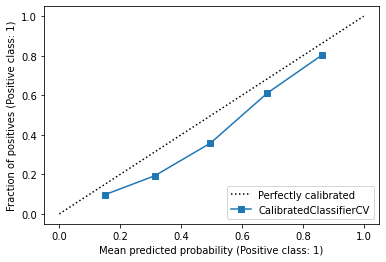

In [177]:
disp = CalibrationDisplay.from_estimator(calibrated, X_trans, y_valid)

In [178]:
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
import time 

def hyperopt(param_space, model, X_train, y_train, X_test, y_test, num_eval):
    
    start = time.time()
    
    def objective_function(params):
        clf = model(**params)
        cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
        n_scores = cross_val_score(clf, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, verbose=100, error_score='raise')
        print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
        clf.fit(X_train, y_train)
        result = score(y_test, clf.predict(X_test))
        return {'loss': -result, 'status': STATUS_OK}

    trials = Trials()
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    
    print("")
    print("##### Results")
    print("Score best parameters: ", min(loss)*-1)
    print("Best parameters: ", best_param)
    print("Time elapsed: ", time.time() - start)
    print("Parameter combinations evaluated: ", num_eval)
    
    return trials, best_param

In [179]:
LGBM_params = {
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 50, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),

    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1.0),
    'subsample': hp.uniform('subsample', 0.4, 1.0),

    'min_child_samples': scope.int(hp.quniform('min_child_samples', 10, 200, 10)),
    'min_child_weight': hp.loguniform('min_child_weight', np.log(1e-3), np.log(1)),
    'min_split_gain': hp.loguniform('min_split_gain', np.log(1e-8), np.log(1)),
    
    'max_delta_step': hp.uniform('min_delta_step', 0, 2),
    'n_estimators': scope.int(hp.quniform('n_estimators', 5, 100, 1)),
    # 'scale_pos_weight':hp.uniform('scale_pos_weight', 1.0, 5.0),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'random_state': hp.choice('random_state', ['100']),
    'n_jobs': hp.choice('n_jobs', ['-1'])
}
# LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)

In [182]:
iterations, best_params = hyperopt(LGBM_params, LGBM,  X_res, y_res, X_trans, y_valid, 20)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.5min

[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:  3.5min remaining: 38.3min

[Parallel(n_jobs=-1)]: Done   3 out of  24 | elapsed:  3.5min remaining: 24.4min

[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:  3.5min remaining: 17.5min

[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed:  3.5min remaining: 13.4min

[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:  3.5min remaining: 10.6min

[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed:  3.5min remaining:  8.6min

[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed:  3.5min remaining:  7.1min

[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:  3.5min remaining:  5.9min

[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:  3.6min remaining:  5.1min

[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:  3.7min remaining:  4.3min

[Parallel(n_jobs=-1)]: Done  12 out of 

NameError: name 'clf_best' is not defined

In [186]:
NuSVC_params = {
    'kernel': hp.choice('kernel', ['rbf', 'linear', 'sigmoid']),
    'nu': hp.uniform('nu', 0.1, 1.0),
    'gamma': hp.uniform('gamma', 1e-2, 1),
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'max_iter': hp.choice('max_iter', [100, 200]),
    'random_state': hp.choice('random_state', [-1, 1000]),
}

In [187]:
iterations, best_params = hyperopt(NuSVC_params, NuSVC,  X_res, y_res, X_trans, y_valid, 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.8min

[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed: 10.9min remaining: 120.4min

[Parallel(n_jobs=-1)]: Done   3 out of  24 | elapsed: 10.9min remaining: 76.6min

[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed: 11.0min remaining: 54.8min

[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed: 11.0min remaining: 41.6min

[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed: 11.0min remaining: 32.9min

[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed: 11.0min remaining: 26.7min

[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed: 11.1min remaining: 22.1min

[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed: 11.1min remaining: 18.5min

[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed: 11.1min remaining: 15.5min

[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed: 11.1min remaining: 13.1min

[Parallel(n_jobs=-1)]: Done  12 out of